In [1]:
import re
import os
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from urllib.parse import urlparse
from sklearn import metrics
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import backend as K
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from sklearn.linear_model import LogisticRegression

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
SIZE = 100
BATCH_SIZE = 16
EPOCHS = 100
SEED = 0

In [3]:
os.environ['PYTHONHASHSEED']=str(SEED)

random.seed(SEED)

np.random.seed(SEED)

tf.random.set_seed(SEED)

In [4]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/XSS_dataset.csv")

In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
#Vectorising the tags
data = np.array(df)

y=[d[1] for d in data]
url=[d[0] for d in data]
vectorised_url=TfidfVectorizer()
x=vectorised_url.fit_transform(url)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle='True',stratify=y)

In [7]:
#Logistic Regression 
model_lg = LogisticRegression(solver='lbfgs', max_iter=10000)

#XGBoost 
model_xg = xgb.XGBClassifier(n_jobs = 8)

#Random Forest
model_rf = RandomForestClassifier(n_estimators=100)

#Decision Tree 
model_dc = DecisionTreeClassifier()

In [8]:
model_lg.fit(x_train,y_train)
score_lg = model_lg.score(x_test,y_test)
print(score_lg)

0.9956172388604821


In [9]:
model_xg.fit(x_train,y_train)
score_xg = model_xg.score(x_test,y_test)
print(score_xg)

[14:43:58] WARNING: /private/var/folders/6t/fjr9gh2x3kzfp_x8d04mv8gm0000gn/T/pip-install-y0vm59pd/xgboost_9fb7486255a9441d88b43152e370bd50/build/temp.macosx-11.1-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9963476990504018


In [10]:
model_dc.fit(x_train,y_train)
score_dc = model_dc.score(x_test,y_test)
print(score_dc)

0.9974433893352812


In [11]:
pred_lg = model_lg.predict(x_test)

pred_xg = model_xg.predict(x_test)

pred_dc = model_dc.predict(x_test)

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1263
           1       1.00      0.99      1.00      1475

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



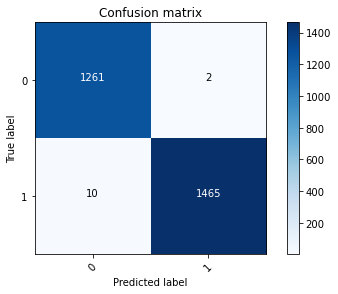

In [14]:
cm = metrics.confusion_matrix(y_test, pred_lg, labels=[0,1])
plot_confusion_matrix(cm,classes=['0','1'])

In [15]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1263
           1       1.00      0.99      1.00      1475

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



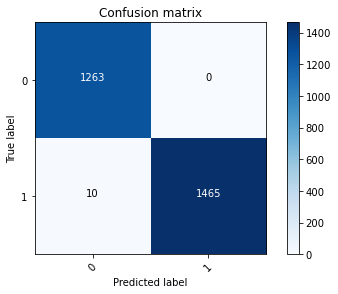

In [16]:
cm = metrics.confusion_matrix(y_test, pred_xg, labels=[0,1])
plot_confusion_matrix(cm,classes=['0','1'])

In [17]:
print(classification_report(y_test,pred_dc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1263
           1       1.00      1.00      1.00      1475

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



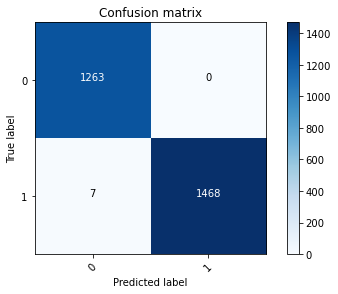

In [18]:
cm = metrics.confusion_matrix(y_test, pred_dc, labels=[0,1])
plot_confusion_matrix(cm,classes=['0','1'])

In [19]:
url_test = ["<li><a href=""/wiki/File:Socrates.png"" class=""image""><img alt=""Socrates.png"" src=""//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/18px-Socrates.png"" decoding=""async"" width=""18"" height=""28"" class=""noviewer"" srcset=""//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/27px-Socrates.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/36px-Socrates.png 2x"" data-file-width=""326"" data-file-height=""500"" /> </a> <a href=""/wiki/Portal:Philosophy"" title=""Portal:Philosophy"">Philosophy&#32;portal </a> </li> </ul>","<tt onmouseover=""alert(1)"">test</tt>"]

In [20]:
x_pred=vectorised_url.transform(url_test)

In [21]:
pred=model_dc.predict(x_pred)

In [23]:
pred

array([0, 1])